# Module I - Climate Regime
<hr>
This module performs climate data analysis and compiling general agro-climatic indicators. These general agro-climatic indicators summarize climatic profiles in the study area for each grid. The key input data for this module is the climatic data, and the geographical and terrain data.
<hr>


## Set Up

First, install any additional python packages that required to run PyAEZ.
If working on your own PC/machine, these additional installation will vary depending on what is already installed in your Python library. 

In [2]:
'''import supporting libraries'''
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
try:
    from osgeo import gdal
except:
    import gdal
import sys

Set up the working directory where the PyAEZ project is located.

In [3]:
'Set the working directory'
work_dir = r'/Users/ming-mayhu/Desktop/毕业论文/qtp-pyaez/qtp_pyaez' # Please change this to your working directory
os.chdir(work_dir)
os.getcwd()


'/Users/ming-mayhu/Desktop/毕业论文/qtp-pyaez/qtp_pyaez'

Check and create data output folder.

In [4]:
'Create output folder if it does not exist'
import os
folder_path = './output/module1/'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print("Folder created successfully.")
else:
    print("Folder already exists.")

Folder created successfully.


<hr>

## MODULE 1: Climate Regime

First, initiate the Module 1 Class instance.

In [5]:
%load_ext autoreload
%autoreload 2
# Import Module 1 and initate Object Class
from pyaez import ClimateRegime
clim_reg = ClimateRegime.ClimateRegime()

# Importing UtilitiesCalc
from pyaez import UtilitiesCalc
obj_util = UtilitiesCalc.UtilitiesCalc()

### Importing the climate dataset and the geographical data/rasters.

The package expects six climate variables, as daily or monthly observations, as Numpy arrays.
Arrays must be 3-dimensional, with the third axes containing the time dimension.
Unit of measures are expected as follows:
- Minimum temperature = Degree Celsius
- Maximum temperature = Degree Celsius
- Precipitation = Accumulated mm / day (or per month)
- Solar radiation = W/m^2
- Wind speed = Average m/s
- Relative humidity = Average fraction (0 to 1)

In addition to climate data, the system requires:
- A binary admin_mask, with 0 and 1 values. 0 pixels values will be not executed, while 1 pixels values will be executed
- An elevation layer
- Soil/terrain/special land cover classes
  

**All the datasets must have the same shape.**

In [30]:
'''reading climate data'''
# Importing the climate data
max_temp = np.load(r'data_input/climate_20yr_averages/1999-2018/TempMax.npy')  # maximum temperature
min_temp = np.load(r'data_input/climate_20yr_averages/1999-2018/TempMin.npy')  # minimum temperature
precipitation = np.load(r'data_input/climate_20yr_averages/1999-2018/Precip.npy')  # precipitation
rel_humidity = np.load(r'data_input/climate_20yr_averages/1999-2018/RH.npy')  # relative humidity
wind_speed = np.load(r'data_input/climate_20yr_averages/1999-2018/Wind.npy') # wind speed measured at two meters
short_rad = np.load(r'data_input/climate_20yr_averages/1999-2018/Radiation.npy')  # shortwave radiation
# Load the geographical data/rasters
mask_path=r'./data_input/qilian admin mask.tif'
mask = gdal.Open(mask_path).ReadAsArray()
elevation = np.load(r'./data_input/terrain/elevation.npy')
# soil_terrain_lulc = gdal.Open(r'../data_input/LAO_soil_terrain_lulc.tif').ReadAsArray()

This section contains parameters that can be modified by the user:
- lat_min = minimum latitude of analysis
- lat_max = maximum latitude of analysis
- mask_value = the value in the admin_mask to exclude from the analysis (typically 0)
- daily = whether climate input data are daily (True) or monthly (False)

In [31]:
# Define the Area-Of-Interest's geographical extents
lat_min = 35.921391739
lat_max = 39.721391739
mask_value = 0  # pixel value in admin_mask to exclude from the analysis
daily = True #Type of climate data = True: daily, False: monthly

### Loading the imported data into the Object Class ('*clim_reg*' Class)

In [32]:
clim_reg.setStudyAreaMask(mask, mask_value)
clim_reg.setLocationTerrainData(lat_min, lat_max, elevation)
if daily:
    clim_reg.setDailyClimateData(
        min_temp, max_temp, precipitation, short_rad, wind_speed, rel_humidity)
else:
    clim_reg.setMonthlyClimateData(
        min_temp, max_temp, precipitation, short_rad, wind_speed, rel_humidity)

In [33]:
'Releasing the memory of input climate data -- free up some RAM space'
del(min_temp, max_temp, precipitation, short_rad, wind_speed, rel_humidity)

NOTE: After loading the data into the *clim_reg* Class, all the parameters will be converted to DAILY DATA and calculated as other parameters. 
These new parameters are available and can be called into use as:
- *clim_reg.minT_daily* (minimum temperature)
- *clim_reg.maxT_daily* (maximum temperature)
- *clim_reg.meanT_daily* (mean temperature)
- *clim_reg.meanT_daily_sealevel* (mean temperature, corrected to sea-level)
- *clim_reg.totalPrec_daily* (total precipitation)
- *clim_reg.pet_daily* (reference evapotranspiration, ETo)
- *clim_reg.P_by_PET_daily* (ratio of precipitation over ETo)
  


#### Thermal Climate
The Thermal Climate function calculates and classifies latitudinal thermal climate, which will be used later in Module 2 for the assessment of potential crops and land utilization types (LUT) presence in each grid cell.

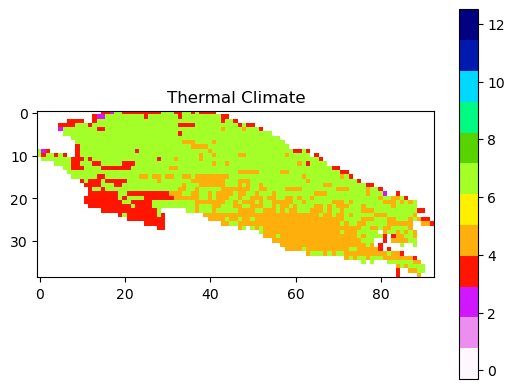

In [34]:
tclimate = clim_reg.getThermalClimate()

'''save and visualize result'''
fig = plt.figure()
plt.imshow(tclimate, cmap=plt.get_cmap('gist_ncar_r', 12),vmin=-0.3,vmax=12.5)
plt.title('Thermal Climate')
plt.colorbar()
plt.savefig("./data_output/module1/1999-2018 thermalClimate.png",bbox_inches ="tight",dpi=300) #Save as PNG image
plt.show()

obj_util.saveRaster(mask_path, './data_output/module1/1999-2018 thermalClimate.tif',tclimate) #Save as GeoTIFF raster

#### Thermal Zone
The thermal zone is classified based on actual temperature which reflects on the temperature regimes of major thermal climates

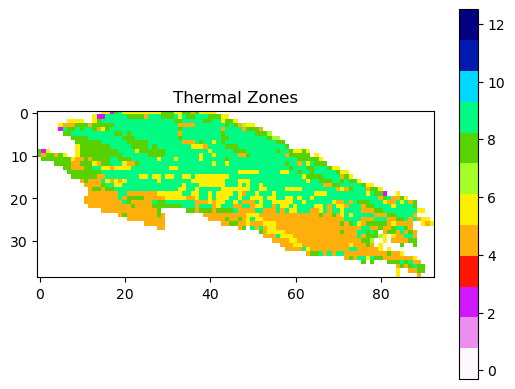

In [ ]:
tzone = clim_reg.getThermalZone()

'''save and visualize result'''
fig = plt.figure()
plt.imshow(tzone, cmap=plt.get_cmap('gist_ncar_r', 12),vmin=-0.3,vmax=12.5)
plt.title('Thermal Zones')
plt.colorbar()
plt.savefig("./data_output/module1/1999-2018 thermalZone.png",bbox_inches ="tight",dpi=300) #Save as PNG image
plt.show()

obj_util.saveRaster(mask_path, './data_output/module1/1999-2018 thermalZone.tif',tzone) #Save as GeoTIFF raster



## Switch to daily climate data (not multi-year)

In [36]:
# Importing the climate data
max_temp = np.load(r'data_input/climate_yearly/1979/TempMax.npy')  # maximum temperature
min_temp = np.load(r'data_input/climate_yearly/1979/TempMin.npy')  # minimum temperature
precipitation = np.load(r'data_input/climate_yearly/1979/Precip.npy')  # precipitation
rel_humidity = np.load(r'data_input/climate_yearly/1979/RH.npy')  # relative humidity
wind_speed = np.load(r'data_input/climate_yearly/1979/Wind.npy') # wind speed measured at two meters
short_rad = np.load(r'data_input/climate_yearly/1979/Radiation.npy')  # shortwave radiation

clim_reg.setStudyAreaMask(mask, mask_value)
clim_reg.setLocationTerrainData(lat_min, lat_max, elevation)
if daily:
    clim_reg.setDailyClimateData(
        min_temp, max_temp, precipitation, short_rad, wind_speed, rel_humidity)
else:
    clim_reg.setMonthlyClimateData(
        min_temp, max_temp, precipitation, short_rad, wind_speed, rel_humidity)
    
'Releasing the memory of input climate data -- free up some RAM space'
del(min_temp, max_temp, precipitation, short_rad, wind_speed, rel_humidity)

#### Thermal Length of Growing Period (LGP)
The thermal length of growing period (LGPt) is defined as the number of days in a year during which the daily mean temperature (Ta) is conductive to crop growth and development. PyAEZ utilizes the AEZ three standard temperature thresholds for LGPt:
- Periods with Ta>0°C (LGPt0)
- Periods with Ta>5°C (LGPt5) – the period conductive to plant growth and development
- Periods, and Ta>10°C (LGPt10) – a proxy for the period of low risks for late and early frost occurrences and termed ‘frost-free period’

In [38]:
lgpt0 = clim_reg.getThermalLGP0()
lgpt5 = clim_reg.getThermalLGP5()
lgpt10 = clim_reg.getThermalLGP10()

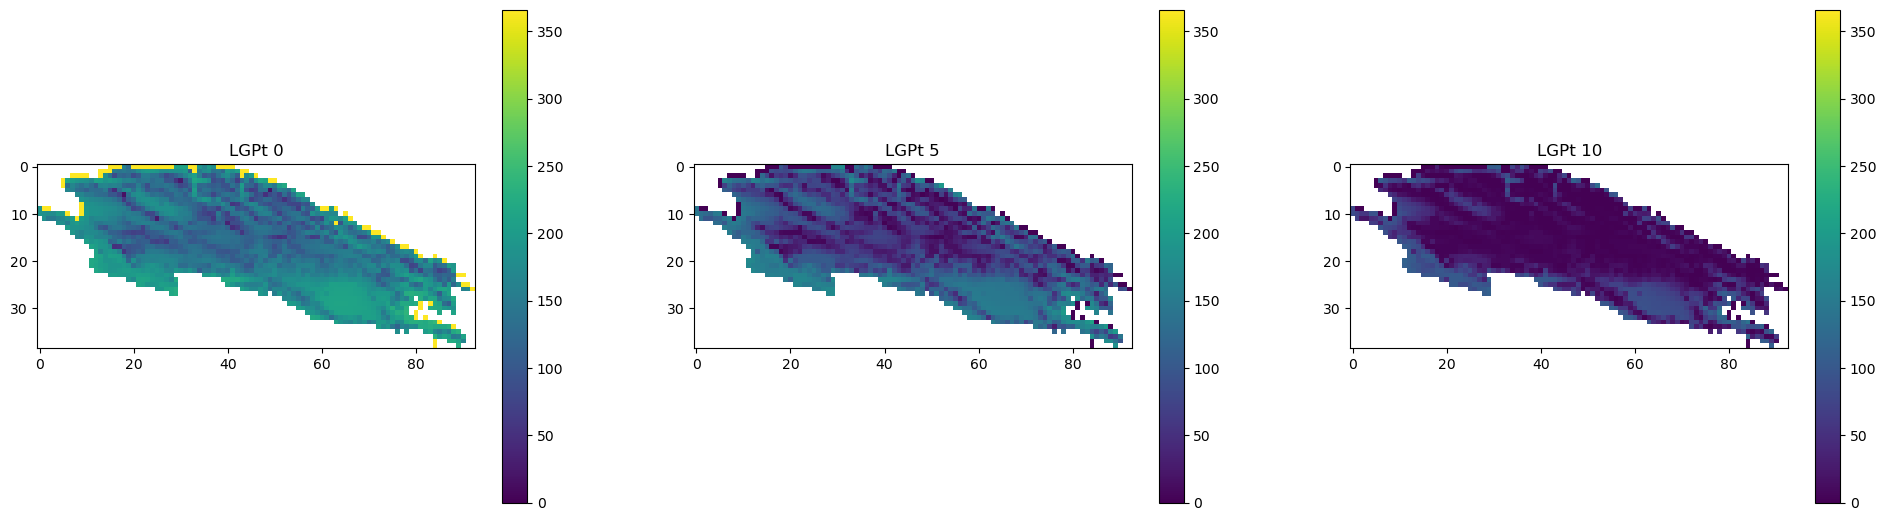

In [39]:
'''save and visualize result'''
#======================
plt.figure(1, figsize=(24, 8))
plt.subplot(1, 3, 1)
plt.imshow(lgpt0,vmin=0,vmax=366)
plt.title('LGPt 0')
plt.colorbar(shrink=0.8)
#----------------------
plt.subplot(1, 3, 2)
plt.imshow(lgpt5, vmin=0, vmax=366)
plt.title('LGPt 5')
plt.colorbar(shrink=0.8)
#----------------------
plt.subplot(1, 3, 3)
plt.imshow(lgpt10, vmin=0, vmax=366)
plt.title('LGPt 10')
plt.colorbar(shrink=0.8)
#----------------------
plt.savefig("./data_output/module1/1979/thermalLGPs.png",
            bbox_inches="tight", dpi=300)
plt.show()
#======================

obj_util.saveRaster(mask_path, './data_output/module1/1979/LGPt0.tif', lgpt0)
obj_util.saveRaster(mask_path, './data_output/module1/1979/LGPt5.tif', lgpt5)
obj_util.saveRaster(mask_path, './data_output/module1/1979/LGPt10.tif', lgpt10)

#### Temperature Sum

In [40]:
tsum0 = clim_reg.getTemperatureSum0()
tsum5 = clim_reg.getTemperatureSum5()
tsum10 = clim_reg.getTemperatureSum10()

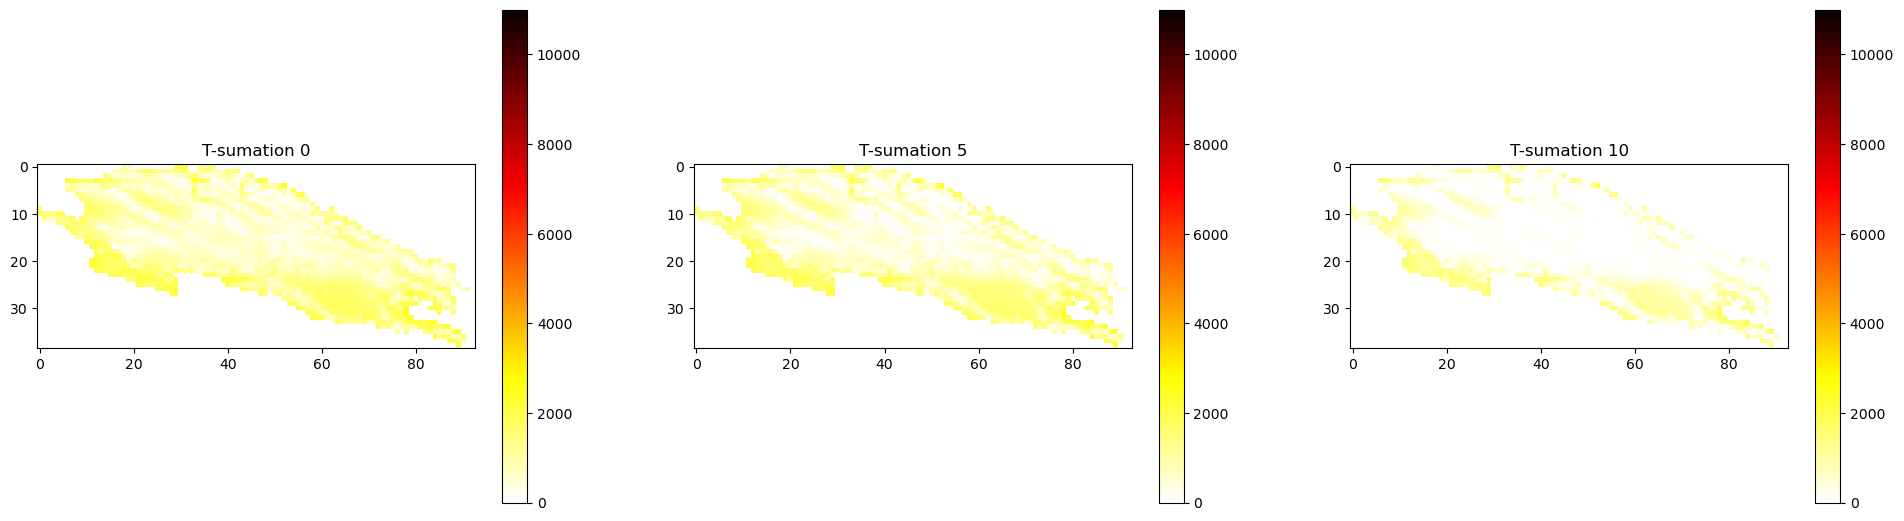

In [41]:
'''save and visualize result'''
#======================
plt.figure(1, figsize=(24, 8))
plt.subplot(1, 3, 1)
plt.imshow(tsum0, cmap='hot_r', vmin=0, vmax=11000)
plt.title('T-sumation 0')
plt.colorbar(shrink=0.8)
#----------------------
plt.subplot(1, 3, 2)
plt.imshow(tsum5, cmap='hot_r', vmin=0, vmax=11000)
plt.title('T-sumation 5')
plt.colorbar(shrink=0.8)
#----------------------
plt.subplot(1, 3, 3)
plt.imshow(tsum10, cmap='hot_r', vmin=0, vmax=11000)
plt.title('T-sumation 10')
plt.colorbar(shrink=0.8)
#----------------------
plt.savefig("./data_output/module1/1979/Tsum.png",
            bbox_inches="tight", dpi=300)
plt.show()
#======================

obj_util.saveRaster(mask_path, './data_output/module1/1979/tsum0.tif', tsum0)
obj_util.saveRaster(mask_path, './data_output/module1/1979/tsum5.tif', tsum5)
obj_util.saveRaster(mask_path, './data_output/module1/1979/tsum10.tif', tsum10)

#### Temperature Profile

In [42]:
tprofile = clim_reg.getTemperatureProfile()

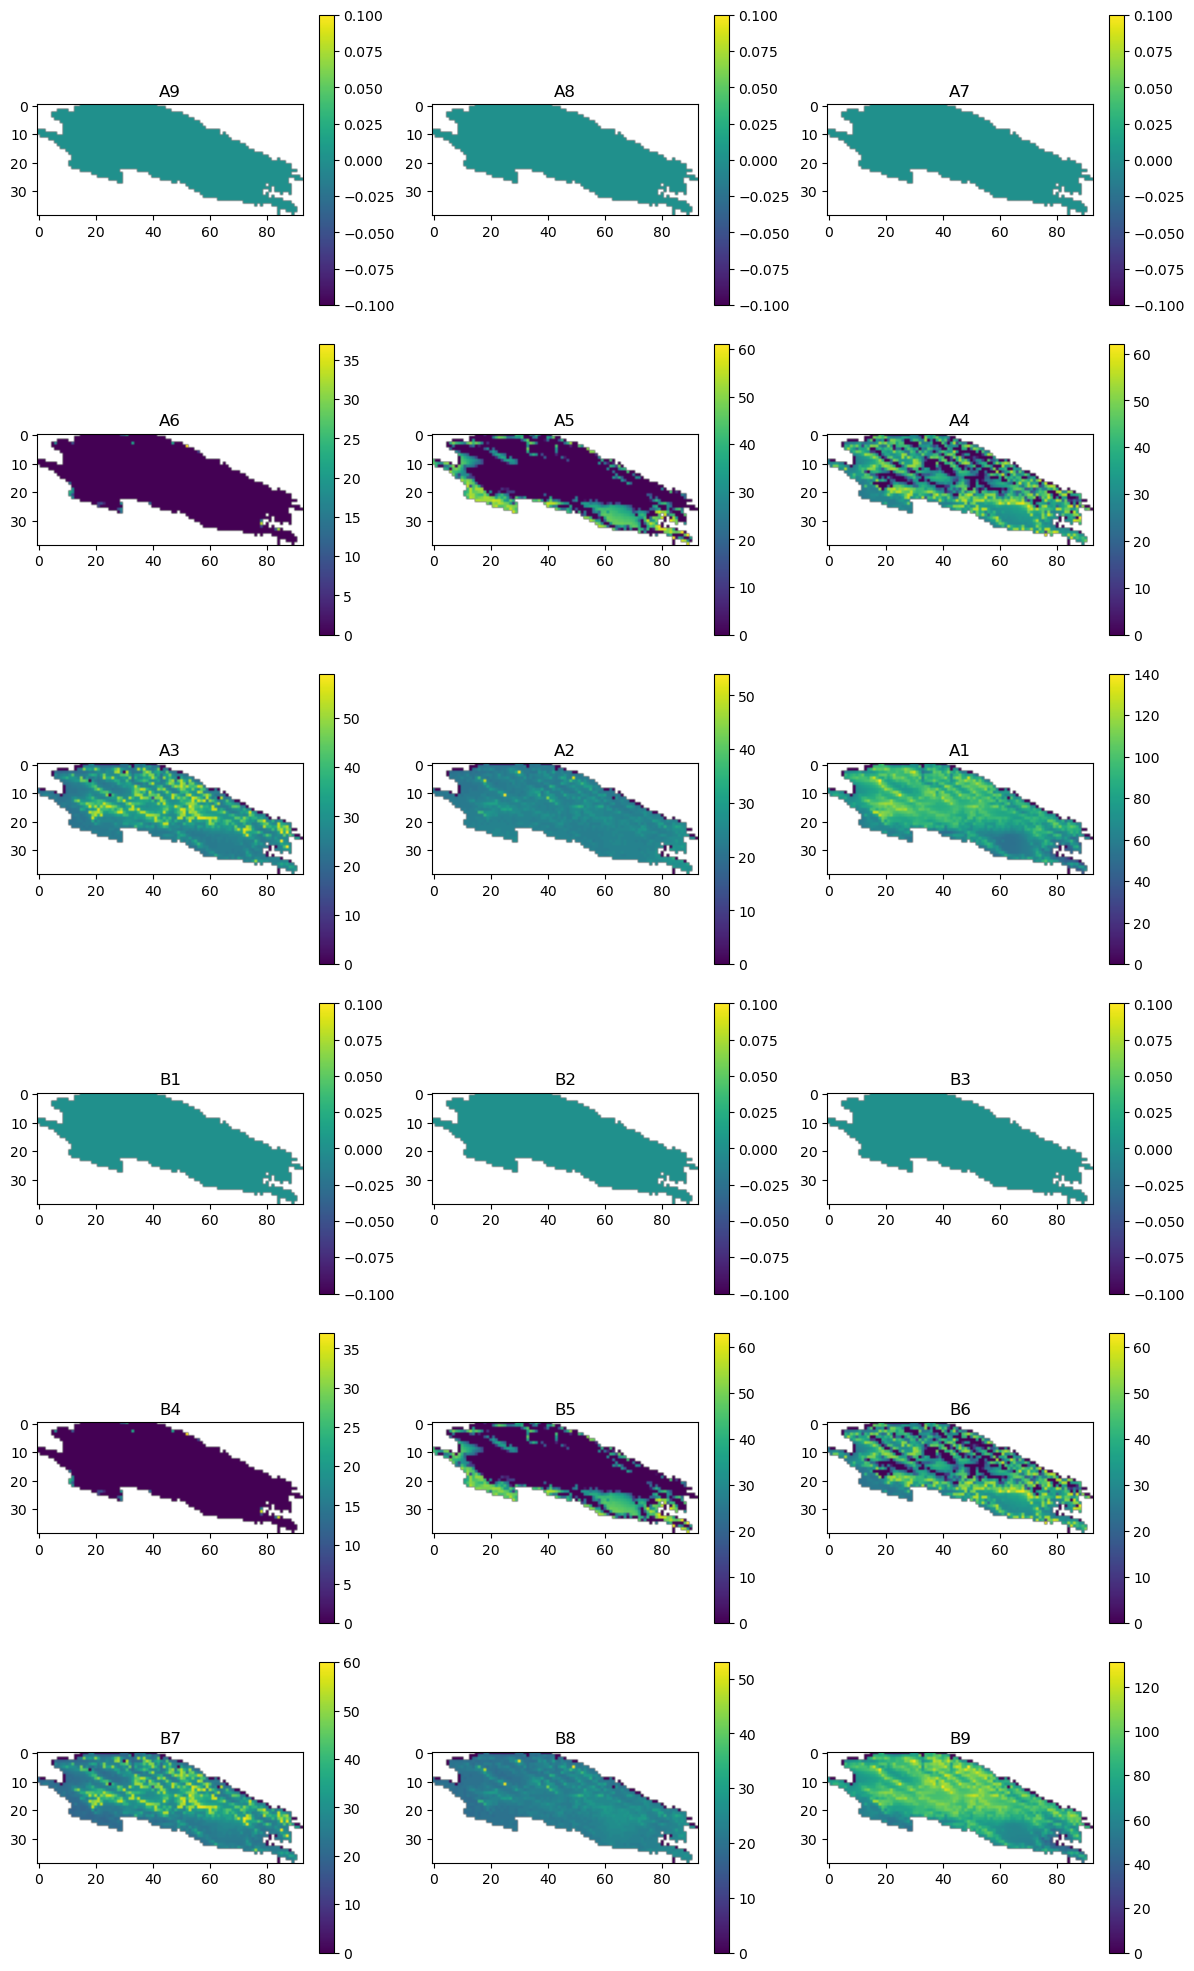

In [43]:
'''save and visualize result'''

tile_list = ['A9', 'A8', 'A7', 'A6', 'A5', 'A4', 'A3', 'A2',
             'A1', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9']

fig = plt.figure(figsize=(12, 20))
for i1 in range(1, 19):
    plt.subplot(6, 3, i1)
    plt.imshow(tprofile[i1-1])
    plt.title(tile_list[i1-1])
    plt.colorbar(shrink=0.9)
plt.tight_layout()

plt.savefig("./data_output/module1/1979/Tprofiles.png",
            bbox_inches="tight", dpi=300)
plt.show()

for i1 in range(18):
    obj_util.saveRaster(
        mask_path, './data_output/module1/1979/TProfile_' + tile_list[i1] + '.tif', tprofile[i1])
    #obj_utilities.saveRaster('./sample_data/input/LAO_Admin.tif', './sample_data/output/NB1/TProfile_' + tile_list[i1] +'.tif', tprofile[i1])


#### Length of Growing Periods (LGPs)

this has to be changed for water balance

In [44]:
lgp = clim_reg.getLGP(Sa=100., D=1.)
lgp_class = clim_reg.getLGPClassified(lgp)
lgp_equv = clim_reg.getLGPEquivalent()

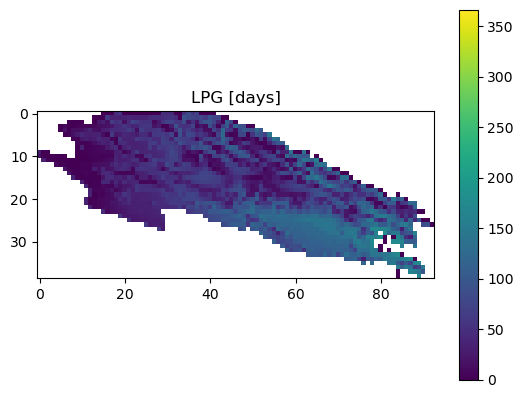

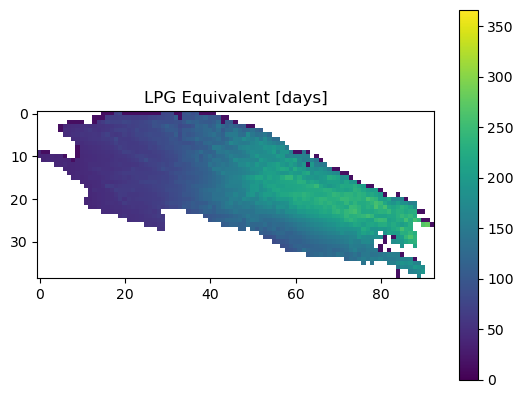

In [45]:
'''save and visualize result'''

plt.imshow(lgp, cmap='viridis', vmin=0, vmax=366)
plt.title('LPG [days]')
plt.colorbar()
plt.savefig("./data_output/module1/1979/LGP.png", bbox_inches="tight", dpi=300)
plt.show()


plt.imshow(lgp_equv, cmap='viridis', vmin=0, vmax=366)
plt.title('LPG Equivalent [days]')
plt.colorbar()
plt.savefig("./data_output/module1/1979/LGP_Equv.png",
            bbox_inches="tight", dpi=300)
plt.show()

obj_util.saveRaster(mask_path, './data_output/module1/1979/LGP.tif', lgp)

obj_util.saveRaster(mask_path, './data_output/module1/1979/LGPEquivalent.tif', lgp_equv)
